# pytorch-jupyter

In [1]:
# importing torch  
import torch

## Verify Torch Installation

In [2]:
# get index of currently selected device  
torch.cuda.current_device()

0

In [3]:
# get number of GPUs available  
torch.cuda.device_count()

1

In [4]:
# get the name of the device  
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1060 6GB'

## Building a Torchvision Classifier

In [ ]:
!pip install matplotlib pillow numpy

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import models, transforms

In [42]:
# load test image
InputImg = Image.open("./assets/aquarium.jpg")

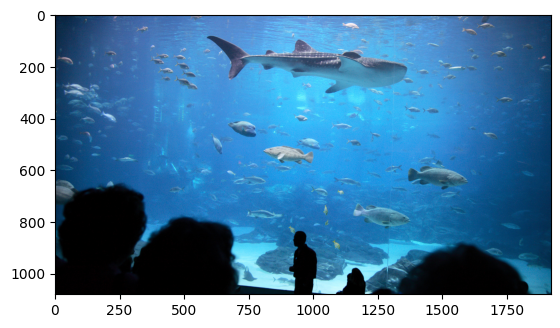

In [43]:
plt.imshow(InputImg)

### Data Preprocessing

In [8]:
transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),               
 transforms.ToTensor(),                   
 transforms.Normalize(                     
 mean=[0.485, 0.456, 0.406],               
 std=[0.229, 0.224, 0.225]                 
 )])

In [9]:
InputImg_t = transform(InputImg)

In [10]:
print(InputImg_t.shape)

torch.Size([3, 224, 224])


In [11]:
InputImg_bt = torch.unsqueeze(InputImg_t, 0);
print(InputImg_bt.shape)

torch.Size([1, 3, 224, 224])


### Using Pre-trained Models

In [14]:
# list available models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [22]:
# get labels for imagenet
with open('./imagenet_labels.txt') as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]

In [ ]:
# load pre-trained efficientnetb0
efficientnet = models.efficientnet_b0(pretrained=True)
efficientnet.eval()

In [19]:
pred_efficientnet = efficientnet(InputImg_bt)

In [ ]:
# load pre-trained mobilenetv3
mobilenet = models.mobilenet_v3_small(pretrained=True)
mobilenet.eval()

In [21]:
pred_mobilenet = mobilenet(InputImg_bt)

#### Multi-label Classification

In [25]:
# get efficientnetb0 multilabel predictions
_, predictedLabels = torch.sort(pred_efficientnet, descending=True)
percentage = torch.sigmoid(pred_efficientnet)[0] * 100
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:10]]

[("3: 'tiger shark, Galeocerdo cuvieri',", 99.95520782470703),
 ("4: 'hammerhead, hammerhead shark',", 99.93539428710938),
 ("5: 'electric ray, crampfish, numbfish, torpedo',", 98.41780090332031),
 ("2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
  98.11659240722656),
 ("6: 'stingray',", 97.3827133178711),
 ("973: 'coral reef',", 97.1445541381836),
 ("983: 'scuba diver',", 95.05075073242188),
 ("391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch',",
  94.81938171386719),
 ("142: 'dowitcher',", 92.43939208984375),
 ("394: 'sturgeon',", 91.97933959960938)]

In [26]:
# get mobilenetv3 multilabel predictions
_, predictedLabels = torch.sort(pred_mobilenet, descending=True)
percentage = torch.sigmoid(pred_mobilenet)[0] * 100
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:10]]

[("4: 'hammerhead, hammerhead shark',", 100.0),
 ("3: 'tiger shark, Galeocerdo cuvieri',", 99.9999771118164),
 ("2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
  99.99908447265625),
 ("394: 'sturgeon',", 99.9989013671875),
 ("395: 'gar, garfish, garpike, billfish, Lepisosteus osseus',",
  99.99828338623047),
 ("973: 'coral reef',", 99.99749755859375),
 ("6: 'stingray',", 99.9974136352539),
 ("5: 'electric ray, crampfish, numbfish, torpedo',", 99.99542236328125),
 ("983: 'scuba diver',", 99.99076080322266),
 ("389: 'barracouta, snoek',", 99.98917388916016)]

#### Single-label Classification

In [28]:
# get efficientnetb0 singlelabel predictions
_, predicted = torch.max(pred_efficientnet, 1)
percentage = torch.softmax(pred_efficientnet, dim=1)[0] * 100
print(ImageNetclasses[predicted[0]], percentage[predicted[0]].item())

3: 'tiger shark, Galeocerdo cuvieri', 43.20240783691406


In [29]:
# get mobilenetv3 singlelabel predictions
_, predicted = torch.max(pred_mobilenet, 1)
percentage = torch.softmax(pred_mobilenet, dim=1)[0] * 100
print(ImageNetclasses[predicted[0]], percentage[predicted[0]].item())

4: 'hammerhead, hammerhead shark', 82.13301849365234


## Saving and Loading Models

In [37]:
torch.save(efficientnet, '.saved_model/efficientnet_b0.pth')

In [38]:
torch.save(mobilenet, '.saved_model/mobilenet_v3_small.pth')

In [45]:
# restore models
efficientnet_b0 = torch.load('.saved_model/efficientnet_b0.pth')
print(efficientnet_b0)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [46]:
# restore models
mobilenet_v3_small = torch.load('.saved_model/mobilenet_v3_small.pth')
print(mobilenet_v3_small)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [40]:
# verify restored efficientnet
pred_efficientnet_b0 = efficientnet_b0(InputImg_bt)

# get efficientnetb0 singlelabel predictions
_, predicted = torch.max(pred_efficientnet_b0, 1)
percentage = torch.softmax(pred_efficientnet_b0, dim=1)[0] * 100
print(ImageNetclasses[predicted[0]], percentage[predicted[0]].item())

3: 'tiger shark, Galeocerdo cuvieri', 43.20240783691406


In [41]:
# verify restored efficientnet
pred_mobilenet_v3_small = mobilenet_v3_small(InputImg_bt)

# get efficientnetb0 singlelabel predictions
_, predicted = torch.max(pred_mobilenet_v3_small, 1)
percentage = torch.softmax(pred_mobilenet_v3_small, dim=1)[0] * 100
print(ImageNetclasses[predicted[0]], percentage[predicted[0]].item())

4: 'hammerhead, hammerhead shark', 82.13301849365234


## Model Conversion (ONNX)

In [ ]:
!pip install onnx onnxruntime

In [52]:
batch_size = 1

In [51]:
# Input to the efficientnet_b0
x = torch.randn(batch_size, 3, 224, 224, requires_grad=True)
torch_out = efficientnet_b0(x)

# Export efficientnet_b0 to ONNX
torch.onnx.export(efficientnet_b0,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  ".saved_model/efficientnet_b0.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=12,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                'output' : {0 : 'batch_size'}})

================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [53]:
# Input to the mobilenet_v3_small
x = torch.randn(batch_size, 3, 224, 224, requires_grad=True)
torch_out = mobilenet_v3_small(x)

# Export efficientnet_b0 to ONNX
torch.onnx.export(mobilenet_v3_small,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  ".saved_model/mobilenet_v3_small.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=12,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                'output' : {0 : 'batch_size'}})

================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



### Verify the ONNX Model

In [57]:
import onnx
import onnxruntime

In [56]:
mobilenet_v3_small_onnx = onnx.load(".saved_model/mobilenet_v3_small.onnx")
onnx.checker.check_model(mobilenet_v3_small_onnx)

In [65]:
ort_session = onnxruntime.InferenceSession(".saved_model/mobilenet_v3_small.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(x)}
ort_outs = ort_session.run(None, ort_inputs)

# compare ONNX Runtime and PyTorch results
np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)